<a href="https://colab.research.google.com/github/Hero0963/dscamp_prediction-of-quality-of-wine/blob/main/dscamp_lv2_prediction_of_quality_of_wine_feature_optimization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#專題實作 #02：紅酒品質分類預測 - 運用資料與特徵優化分析
今天我們希望著重在「資料」與「特徵」的觀點來進行探索與優化，運用到「資料探索與視覺化」與「特徵工程」兩個重要的能力。接下來有幾個任務請你完成，將答案以文字或註解方式補充於程式碼中：

1. 請嘗試觀察與標籤欄位「紅酒品質 quality」關係比較大的特徵欄位有哪些？你是如何定義「關係大」的呢？
使用相關性分析來評估特徵與標籤之間的關係
alcohol
volatile acidity
sulphates
citric acid
total sulfur dioxide
density

與 quality 相關係數絕對值 > 0.15

（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？

['residual sugar', 'free sulfur dioxide'] 應該被排除，因為用兩種重要性方法，取最後3名的交集

3. 請你針對「數值型」的幾個欄位，嘗試比較不同的正規化方法（例如：Standardize、Min-Max Normalization）？

4. 請問「不平衡」的標籤欄位資料可能會造成怎樣的影響，請你試著去解決不平衡的問題。
某個類別的樣本數量低於整體資料集樣本數量的一定百分比（如5%），則可以將其判定為不平衡資料集。
5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [ ]:
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
features = df.drop('quality', axis=1)
labels = df['quality']

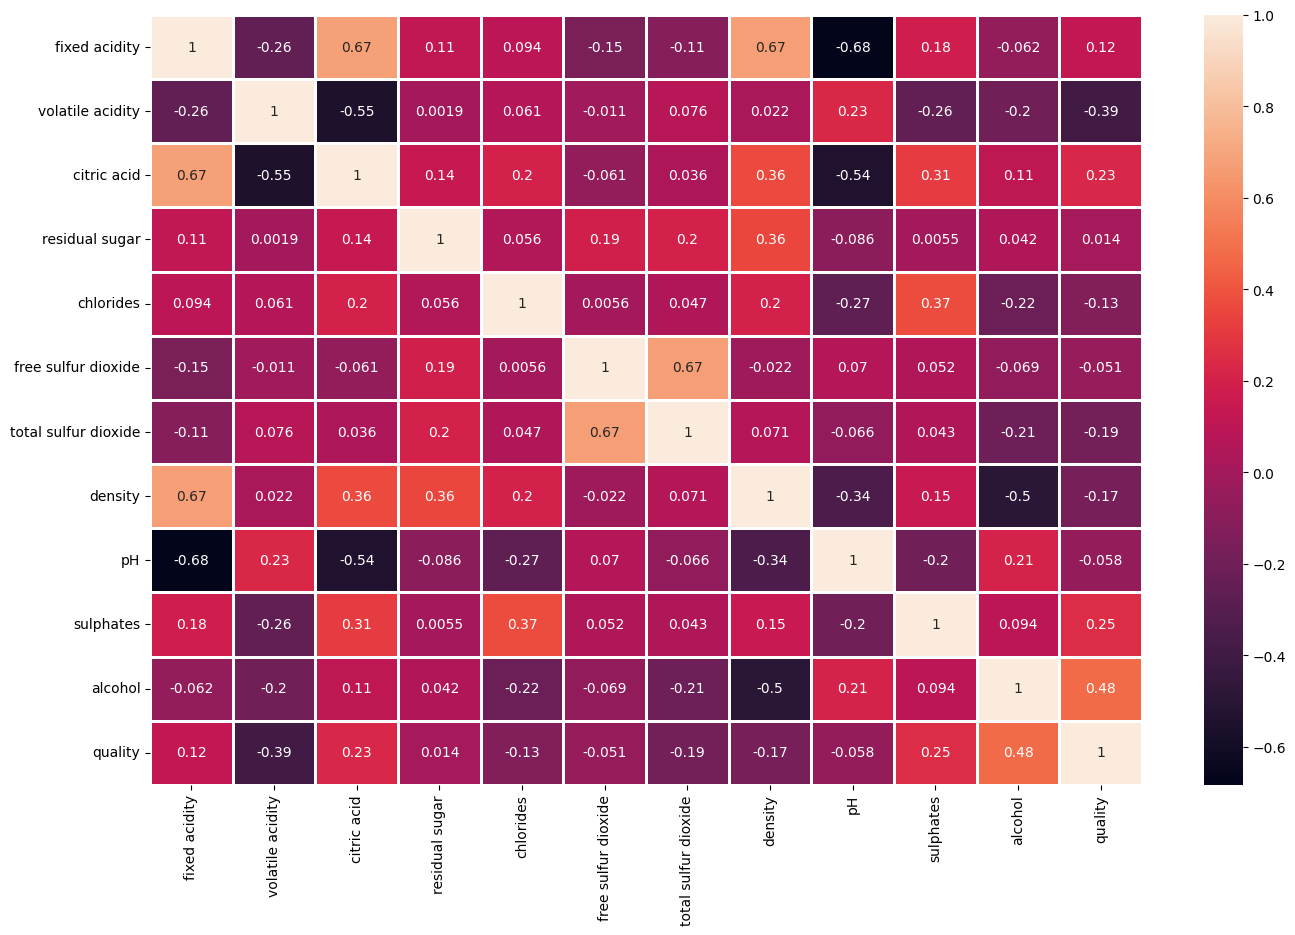

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 比較每個特徵間的關聯程度
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, linewidth = 1)
plt.show()

# 找出高度正相關的特徵們

In [ ]:
correlations = df.corr()['quality'].abs().sort_values(ascending=False)
display(correlations)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = features
y = labels

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)

                 Feature  Importance
10               alcohol    0.145859
9              sulphates    0.114148
6   total sulfur dioxide    0.106404
1       volatile acidity    0.100396
7                density    0.091567
4              chlorides    0.078367
8                     pH    0.075516
0          fixed acidity    0.074625
3         residual sugar    0.073667
2            citric acid    0.072139
5    free sulfur dioxide    0.067311


In [ ]:
total_importance = importance_df['Importance'].sum()
print(total_importance)

1.0


In [ ]:
importance_ranking1 = correlations.index.tolist()
importance_ranking2 = importance_df['Feature'].tolist()

last3_ranking1 = importance_ranking1[-3:]
last3_ranking2 = importance_ranking2[-3:]

set1 = set(last3_ranking1)
set2 = set(last3_ranking2)

intersection = set1.intersection(set2)

intersection_list = list(intersection)

display(intersection_list)

['residual sugar', 'free sulfur dioxide']

In [ ]:
display(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化
scaler = StandardScaler()
features_normalized_standardized  = features.copy()
features_normalized_standardized = scaler.fit_transform(features_normalized_standardized)

# 最小最大化正規化
scaler = MinMaxScaler()
features_normalized__minmax  = features.copy()
features_normalized__minmax =  scaler.fit_transform(features_normalized__minmax)


display(features_normalized_standardized)
display(features_normalized__minmax)

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

1. 不平衡的標籤欄位資料可能會對機器學習模型的訓練和預測產生影響。以下是可能的影響：

偏誤預測結果：當標籤類別之間的樣本數量差異很大時，模型可能會偏向預測數量較多的類別。這導致模型對於少數類別的預測效果不佳。
過擬合：當數據不平衡時，模型容易過度擬合於數量較多的類別，而忽略數量較少的類別。這可能導致模型在新數據上的泛化能力下降。
評估偏差：常用的分類評估指標（如準確度）可能會產生誤導，因為它們無法完全反映出不平衡數據集中不同類別的預測表現。

2. 要檢查或判定標籤欄位是否不平衡，可以通過觀察類別分佈的方式。以下是一些方法：

計算每個類別的樣本數量：可以使用 pandas 的 value_counts() 方法來計算每個類別的樣本數量，並觀察數量差異。
繪製類別分佈圖：可以使用柱狀圖或餅圖等方式，將每個類別的樣本數量可視化，以更直觀地觀察類別之間的差異。

3. 解決不平衡問題的方法有多種，以下是一些常見的方法：

過採樣（Oversampling）：增加少數類別的樣本數量，使其與多數類別的數量相當。常見的過採樣方法包括重複樣本、SMOTE（合成少數類過樣本）等。
欠採樣（Undersampling）：減少多數類別的樣本數量，使其與少數類別的數量相當。常見的欠採樣方法包括隨機刪除樣本、集群方法等。
混合採樣（Combination Sampling）：結合過採樣和欠採樣的方法，同時增加少數類別和減少多數類別的樣本數量，以實現類別平衡。
類別加權（Class Weighting）：在模型訓練過程中，給予少數類別較高的權重，以平衡類別之間的重要性。


#判定是不是不平衡資料集

In [ ]:
quality_counts = df['quality'].value_counts()
quality_counts = quality_counts.rename_axis('Quality').reset_index(name='Count')
print(quality_counts.to_string(index=False))

 Quality  Count
       5    681
       6    638
       7    199
       4     53
       8     18
       3     10


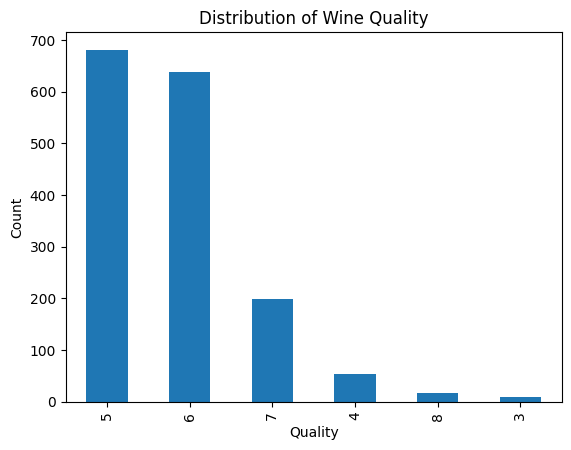

In [ ]:
# 使用柱狀圖
quality_counts.plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

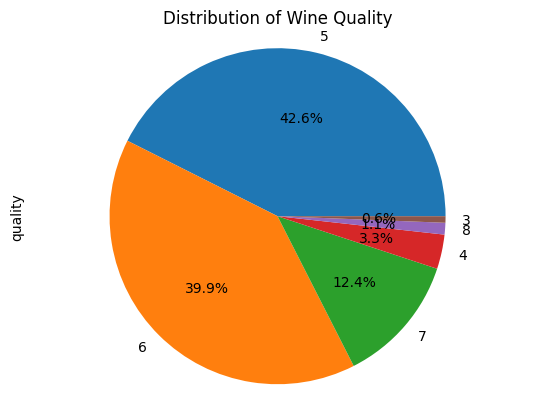

In [ ]:
quality_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # 讓圖形呈現圓形
plt.title('Distribution of Wine Quality')
plt.show()

聚類特徵（Clustering Features）：使用聚類算法將樣本分為不同的群組，並將每個樣本所屬的群組作為新的特徵。這可以幫助模型捕捉樣本之間的相似性

In [ ]:
print(type(features_normalized_standardized))

<class 'numpy.ndarray'>


In [ ]:
features_normalized_standardized = pd.DataFrame(features_normalized_standardized, columns=features.columns)
print(type(features_normalized_standardized))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.cluster import KMeans

# 選擇特徵子集
excluded_features = ['residual sugar', 'free sulfur dioxide']
selected_features = [f for f in features.columns if f not in excluded_features]

# 資料預處理

# 假設你的資料集為 df，進行特徵縮放等必要的預處理步驟


n_clusters = len(df['quality'].unique())

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_normalized_standardized[selected_features].values)

# 獲取聚類結果
cluster_labels = kmeans.labels_

# 新特徵的命名
new_feature_name = 'cluster_label'

# 將聚類結果作為新特徵添加到原始資料集
features_normalized_standardized[new_feature_name] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


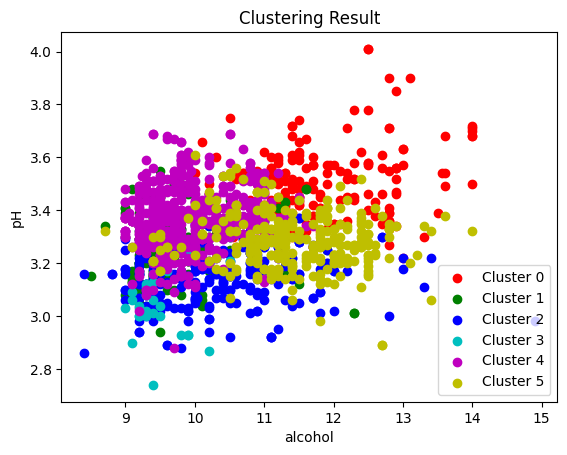

In [ ]:
import matplotlib.pyplot as plt

# 設定散點圖顏色
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# 繪製散點圖
for label, color in zip(range(n_clusters), colors):
    # 取出該聚類的資料點
    cluster_data = df[cluster_labels == label]

    # 提取兩個特徵用於散點圖
    feature1 = cluster_data['alcohol']
    feature2 = cluster_data['pH']

    # 繪製散點圖
    plt.scatter(feature1, feature2, c=color, label=f'Cluster {label}')

# 設定圖表標籤等
plt.xlabel('alcohol')
plt.ylabel('pH')
plt.title('Clustering Result')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
excluded_features = ['residual sugar', 'free sulfur dioxide', 'cluster_label']
selected_features = [f for f in features.columns if f not in excluded_features]

X = features_normalized_standardized[selected_features]
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.66015625 0.6875     0.6484375  0.7109375  0.72156863]


不同 正規化方法

In [ ]:
excluded_features = ['residual sugar', 'free sulfur dioxide', 'cluster_label']
selected_features = [f for f in features.columns if f not in excluded_features]
features_normalized__minmax = pd.DataFrame(features_normalized__minmax, columns=features.columns)

X = features_normalized__minmax[selected_features]
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.65625    0.68359375 0.671875   0.69140625 0.7372549 ]


不排除特徵

In [ ]:
X = features_normalized_standardized
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.6484375  0.6796875  0.65234375 0.69921875 0.74509804]


In [ ]:
X = features_normalized__minmax
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.65625    0.69140625 0.6640625  0.69921875 0.74509804]


#OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# 創建Oversampling的實例
# 隨機過採樣（Random Over Sampling）
ros = RandomOverSampler(random_state=42)

# SMOTE過採樣（Synthetic Minority Over-sampling Technique）
smote = SMOTE(random_state=42)

# 使用Oversampling方法處理不平衡數據集
X_ros, y_ros = ros.fit_resample(X, y)  # 使用Random Over Sampling
X_smote, y_smote = smote.fit_resample(X, y)  # 使用SMOTE

# X_ros 和 y_ros 是經過Random Over Sampling後的新數據集
# X_smote 和 y_smote 是經過SMOTE過採樣後的新數據集

In [ ]:
X = X_smote
y = y_smote

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.87614679 0.86544343 0.86697248 0.84992343 0.87595712]


In [ ]:
print("features_normalized__minmax shape:", features_normalized__minmax.shape)
print("labels shape:", labels.shape)

features_normalized__minmax shape: (1599, 11)
labels shape: (1599,)


In [ ]:
print("X_smote shape:", X_smote.shape)
print("y_smote shape:", y_smote.shape)

X_smote shape: (4086, 11)
y_smote shape: (4086,)


In [ ]:
X = X_smote
y = y_smote
X_test = features_normalized__minmax
y_test = labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8545232273838631
